<a href="https://colab.research.google.com/github/Heloput/machinelearning/blob/main/laba5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Обучение  CNN на полном наборе данных Cats-v-dogs
От вас потребуется некоторая предварительная обработка, потому что
набор данных не разделен на обучение и проверку.

In [1]:
# В этом блоке кода находятся все необходимые импорты
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Сначала надо получить данные.

In [2]:
# Этот блок кода загружает полный набор фотографий кошек и собак и сохраняет его как
# cats-and-dogs.zip. Затем он распаковывает его в /tmp.
# Будет создан каталог tmp/PetImages, содержащий подкаталоги
# под названием 'Cat' и 'Dog'.
# Если URL не работает,
# зайдите на https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765


!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2024-12-25 16:43:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.25.248.114, 2600:1413:b000:79b::317f, 2600:1413:b000:792::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.25.248.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   186MB/s    in 4.3s    

2024-12-25 16:43:51 (184 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



Проверьте, все ли получилось

In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Вывод должен быть примерно такой:
# 12501
# 12501

12501
12501


In [4]:
# Используйте функцию os.mkdir чтобы создавать каталоги
# Вам понадобится каталог cats-v-dogs и в нем подкаталоги: training и testing.
# В каждом из этих подкаталогов надо будет создать два подкаталога: cats и dogs
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

###распределение файлов по каталогам в заданной пропорции

Напишите на Python свою функцию **split_data**
со следующими параметрами:

*SOURCE* - каталог, в котором содержатся нужные файлы

*TRAINING* - каталог, в который надо скопировать часть файлов из SOURCE

*TESTING* - каталог, в который надо скопировать оставшуюся часть файлов из SOURCE

*SPLIT_SIZE* - определяет в долях единицы соотношение частей TRAINING и TESTING

**split_data** делит имеющиеся файлы на два набора в указанной пропорции.
например, если SOURCE - PetImages/Cat, а SPLIT_SIZE - .9, то 90% изображений из PetImages/Cat должны копироваться в каталог TRAINING, а 10% изображений - в каталог TESTING

Файлы должны быть выбраны случайно.
Кроме того, все изображения должны быть проверены, и файлы с нулевой длиной не должны копироваться

In [5]:
# os.listdir(DIRECTORY) - список содержимого этого каталога
# os.path.getsize(fullName)  - размер указанного файла
# copyfile(sourceFullName, destinationFullName) копирует данные из source в destination.
# random.sample(list, len(list)) возвращает перемешанный список указанной длины

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []

    for i in os.listdir(SOURCE):
      add_file =SOURCE+i
      if os.path.getsize(add_file)>0:
        files.append(i)
      else: print(i,"имеет нулевую длину, не копируется")

    train_lenth = int(len(files) * SPLIT_SIZE)
    temp = random.sample(files, len(files))
    temp_train = temp[0:train_lenth]
    temp_test = temp[train_lenth:]

    for i in temp_train:
      copyfile(SOURCE+i, TRAINING+i)

    for k in temp_test:
      prom_file2 =SOURCE+k
      copyfile(prom_file2, TESTING + k)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# ожидаемый вывод:
# 666.jpg имеет нулевую длину, не копируется
# 11702.jpg имеет нулевую длину, не копируется

666.jpg имеет нулевую длину, не копируется
11702.jpg имеет нулевую длину, не копируется


проверьте, все ли идет по плану

In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# ожидаемый вывод:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


###Определите модель KERAS для классификации кошек и собак.

Используйте как минимум три сверточных слоя

In [8]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Вторая свертка
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Третья свертка
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Добавляем слой предварительной подготовки данных обучения и валидации.

Используйте Data Generator, как вы делали это раньше.

In [9]:
TRAINING_DIR = "/tmp/cats-v-dogs/training"
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen =ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


# Ожидаемый вывод
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


Запускаем обучение модели.

*Обратите внимание: при загрузке изображений вы можете получить предупреждения об отсутствии или повреждении данных EXIF. Не беспокойтесь об этом - в изображениях отсутствуют некоторые тэги, это не визуальные данные, которые бы повлияли на тренировку.*

In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# Здесь ожидается, что после обучения модели точность будет более 95% как тренировочная, так и при валидации.

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 92/225 ━━━━━━━━━━━━━━━━━━━━ 1:30 681ms/step - acc: 0.5309 - loss: 0.7482

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 ━━━━━━━━━━━━━━━━━━━━ 168s 695ms/step - acc: 0.5555 - loss: 0.7094 - val_acc: 0.6755 - val_loss: 0.5937
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 159s 687ms/step - acc: 0.6598 - loss: 0.6137 - val_acc: 0.7311 - val_loss: 0.5503
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 156s 674ms/step - acc: 0.6861 - loss: 0.5896 - val_acc: 0.7447 - val_loss: 0.5145
Epoch 4/15
 28/225 ━━━━━━━━━━━━━━━━━━━━ 2:08 651ms/step - acc: 0.7280 - loss: 0.5338

Смотрим графики процесса тренировки

Text(0.5, 1.0, 'Training and validation loss')

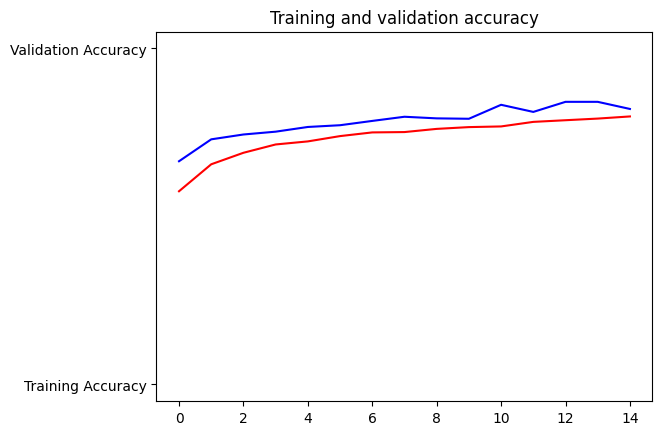

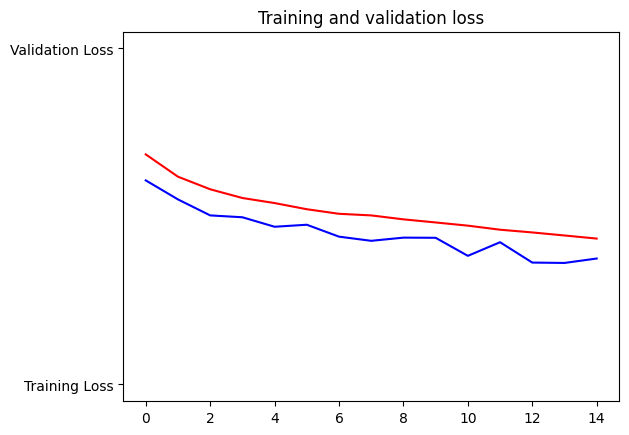

In [ ]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Получить список результатов на тренировочных и тестовых данных
# наборов для каждой эпохи обучения
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # количество эпох

#------------------------------------------------
# Рисуем точность обучения и проверки по эпохам
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Рисуем потери обучения и проверки по эпохам
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Желаемый вывод: графики с показателями обучения и валидации

###Запускаем наш классификатор
Это просто для удовольствия. Загрузить изображение и классифицировать его без сбоев

In [ ]:
import numpy as np
from google.colab import files
import keras as image

uploaded = files.upload()

for fn in uploaded.keys():

  # Предсказание изображений
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " это собака")
  else:
    print(fn + " это кошка")

TypeError: 'NoneType' object is not subscriptable